## Convocatoria 1 - Proyecto 2

### Ejercicio 1 (4 puntos)
Utilizar el conjunto de datos "dataset_1.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1.a) Imputación de valores ausentes (2 puntos)

- En aquellas instancias (filas) que contengan UN ÚNICO VALOR NaN en alguno de sus atributos (columnas), se imputará dicho valor.
 * Si el atributo corresponde a una variable discreta, se imputará el valor utilizando la moda de dicho atributo. 
 * Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo. 
- Aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo. 

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M. 

In [4]:
# Carga de datos
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

datos_train = np.load('dataset_1.npy')

# Separación de los atributos e instancias para la matriz X y el vector y
X = datos_train[:,:-1]
y = datos_train[:,-1]

print(np.shape(X))


(500, 8)


In [2]:
# Se depura aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo.
nulo = np.count_nonzero(np.isnan(X), axis=1)
X_data = np.delete(X, np.where(nulo > 1), axis=0)

print(np.shape(X_data))

(495, 8)


In [6]:
# Se valida si existen datos continuos o discretos
continuo_cols = pd.DataFrame(X_data).select_dtypes(include=['float64', 'int']).columns.to_list()
discreto_cols = pd.DataFrame(X_data).select_dtypes(include=['bool']).columns.to_list()

print(continuo_cols)
print(discreto_cols)

[0, 1, 2, 3, 4, 5, 6, 7]
[]


In [8]:
# Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo.
imp = SimpleImputer(missing_values=np.nan, strategy='mean') # Utilizamos la estrategia de la media
imputer_entrenado = imp.fit(X_data)
X_valor = imputer_entrenado.transform(X_data)
print(np.shape(X_valor))


(495, 8)


In [9]:
# Los outputs deberán ser:
# Una matriz "X" de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
# Un vector "y" de dimensiones M.

print(X_valor)
print(y)

[[ 0.          4.          1.         ...  9.04481012  8.2603626
   7.37490176]
 [ 0.          4.          0.         ...  8.56908202 10.9370737
  10.30131004]
 [ 0.          3.          1.         ...  9.68777842 10.69134847
  11.45671439]
 ...
 [ 0.          2.          0.         ...  2.95882711  1.94458971
   8.88390924]
 [ 0.          3.          2.         ...  2.95542398  1.92895933
   9.03304966]
 [ 0.          4.          0.         ...  2.94928374  2.0478487
   8.86096477]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.


#### 1.b) Eliminación de valores outliers extremos (2 puntos)
- Aplicar el método de Elliptic Envelope fijando una semilla en 42
- Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión
- Plotear el diagrama (box and whiskers) obtenido a partir de las puntuaciones calculadas con el método Elliptic Envelope
- Eliminar las instancias que contengan valores outliers extremos

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M' x N, donde M' será el nuevo número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M'. 

In [16]:
# Limpieza de datos: detección de outliers.
# Aplicar el método de Elliptic Envelope fijando una semilla en 42
outlier_method = EllipticEnvelope(support_fraction=1, random_state = 42).fit(X_valor)

# Obtenemos unos valores de puntuación a nivel de instancia para determinar después las que corresponden con valores atípicos
scores_pred = outlier_method.decision_function(X_valor)
print(np.shape(scores_pred))

(495,)


limite inferior:  -6.476930623286433
limite superior:  19.45329215525228


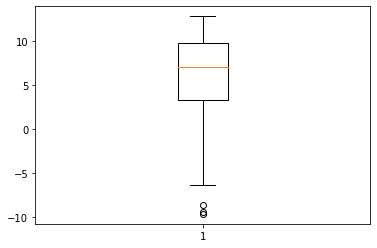

In [17]:
# Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión de los cuales vamos a determinar qué valores son outliers

Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC #xmin
ls = Q3 + 1.5*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

plt.boxplot(scores_pred)
plt.show()

In [18]:
# Estimación de outliers. Encontramos la posición de los outliers dentro de nuestros conjunto de datos
pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)

print('Posición de outliers en el extremo inferior: ', pos_i[0])
print('Posición de outliers en el extremo superior: ', pos_s[0])

Posición de outliers en el extremo inferior:  [ 67 449 470]
Posición de outliers en el extremo superior:  []


In [19]:
mask_outliers = np.zeros(np.shape(scores_pred))
mask_outliers[pos_i] = 1
mask_outliers[pos_s] = 1


In [20]:
# Contamos el número de datos reales y de outliers que hemos detectado
valores, ocurrencias = np.unique(mask_outliers, return_counts=True)
print(valores, ocurrencias)
print('Número de instancias normales: ', ocurrencias[0])
print('Número de instancias atípicas: ', ocurrencias[1])

[0. 1.] [492   3]
Número de instancias normales:  492
Número de instancias atípicas:  3


In [21]:
# Eliminar las instancias que contengan valores outliers extremos

X_final = np.delete(X_valor, np.where(mask_outliers == 1), axis=0)

# Dataset sin outliers
print(np.shape(X_final))
print(X_final)


(492, 8)
[[ 0.          4.          1.         ...  9.04481012  8.2603626
   7.37490176]
 [ 0.          4.          0.         ...  8.56908202 10.9370737
  10.30131004]
 [ 0.          3.          1.         ...  9.68777842 10.69134847
  11.45671439]
 ...
 [ 0.          2.          0.         ...  2.95882711  1.94458971
   8.88390924]
 [ 0.          3.          2.         ...  2.95542398  1.92895933
   9.03304966]
 [ 0.          4.          0.         ...  2.94928374  2.0478487
   8.86096477]]


### Ejercicio 2 (6 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, MSE, RMSE, MAPE y R2 aplicando los regresores OLS y KNN en DOS datasets de regresión (a elegir). Nota: Al menos uno de los datasets deberá ser externo a la librería de scikit-learn.

Se debe llevar a cabo:
- Exploración de los datos y descripción del dataset
- Tratamiento de outliers y valores perdidos (si los hay)
- Partición externa de datos
- Estandarización de los datos
- Selección de atributos mediante métodos supervisados (solo uno)
- Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
- Modelado
- Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
- Breve discusión comparando los resultados obtenidos con cada método.

In [111]:
import numpy as np
from scipy import stats
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [171]:
# Exploración de los datos y descripción del dataset: El dataset es de diabetes de la librería sklearn
# Al cargar devuelve el conjunto de datos de diabetes (clasificación).

datos = datasets.load_diabetes()
X = datos.data
y = datos.target
print('Dimensiones de X: ', np.shape(X))

Dimensiones de X:  (442, 10)


In [44]:
# Se trata los outliers
outlier = EllipticEnvelope(random_state = 42).fit(X)

score = outlier.decision_function(X)
Q1 = stats.scoreatpercentile(score, 25)
Q3 = stats.scoreatpercentile(score, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC #xmin
ls = Q3 + 1.5*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

pos_i = np.where(score<li)
pos_s = np.where(score>ls)

mask_outliers = np.zeros(np.shape(score))
mask_outliers[pos_i] = 1
mask_outliers[pos_s] = 1

valores, ocurrencias = np.unique(mask_outliers, return_counts=True)
print('Número de instancias normales: ', ocurrencias[0])
print('Número de instancias atípicas: ', ocurrencias[1])

X_data= np.delete(X, np.where(mask_outliers == 1), axis=0)
y_data= np.delete(y, np.where(mask_outliers == 1), axis=0)

# Dataset sin outliers
print(np.shape(X_data))


limite inferior:  50.708155017995836
limite superior:  114.9145448935088
Número de instancias normales:  371
Número de instancias atípicas:  71
(371, 10)


In [113]:
# Partición externa de datos
X_training, X_testing, y_training, y_testing = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(np.shape(X_training))
print(np.shape(X_testing))

(296, 10)
(75, 10)


In [114]:
# Estandarización de los datos
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)


In [115]:
# Selección de atributos mediante métodos supervisados (solo uno)
# Se escoge F-Test.
sel = SelectPercentile(score_func = f_regression, percentile=90)
X_training = sel.fit_transform(X_stdr, y_training)
print(np.shape(X_training))


(296, 9)


In [116]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'RMSE': 'neg_root_mean_squared_error',
  'MAPE': 'neg_mean_absolute_percentage_error',
  'R2':   'r2'
}

In [167]:
# # Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
k = 10
algoritmos = {'OLS': linear_model.LinearRegression(),
              'KNN': KNeighborsRegressor(n_neighbors = k, weights='uniform', metric='euclidean')}

results={}
for nombre, alg in algoritmos.items():
    results[nombre] = cross_validate(alg, X_training, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42), scoring=metricas)
print(results)


{'OLS': {'fit_time': array([0.00088882, 0.00145912, 0.00127292, 0.00197983, 0.00090599,
       0.00128603, 0.00088501, 0.00063491, 0.00083303, 0.00083518]), 'score_time': array([0.00159407, 0.00175714, 0.00190401, 0.00129199, 0.00142717,
       0.00206304, 0.00119495, 0.00106907, 0.00134397, 0.00126481]), 'test_MAE': array([-44.91191103, -46.98493084, -37.1533457 , -40.91677693,
       -48.60310159, -47.47985649, -52.01568651, -41.70569986,
       -50.03017475, -38.91129089]), 'test_MSE': array([-3015.61453002, -3450.49594571, -2012.6954239 , -2292.87802503,
       -3707.2534185 , -3586.14611488, -3648.10426643, -2662.31957402,
       -3910.06174444, -2611.6500293 ]), 'test_RMSE': array([-54.91461126, -58.74092224, -44.86307417, -47.88400594,
       -60.88721884, -59.88443967, -60.39953863, -51.59767024,
       -62.53048652, -51.10430539]), 'test_MAPE': array([-0.51055573, -0.32853369, -0.36817141, -0.34665855, -0.53359939,
       -0.43510722, -0.45253336, -0.48031471, -0.49014099, -0.

In [118]:
# Modelado
OLS_definitivo = algoritmos['OLS'].fit(X_training, y_training)
KNN_definitivo = algoritmos['KNN'].fit(X_training, y_training)


In [119]:
# Estandarización de las característiacs de test
X_test = standardizer.transform(X_testing)

# Selección de las características de test
X_test = sel.transform(X_test)

# Predicción del conjunto de test
y_pred_test_ols = OLS_definitivo.predict(X_test)
y_pred_test_knn = KNN_definitivo.predict(X_test)

y_pred = [y_pred_test_ols, y_pred_test_knn]

# Evaluar diversas métricas de clasificación
from sklearn import metrics

from tabulate import tabulate
headers = ['', 'OLS', 'KNN']
MAE, MSE, RMSE, MAPE, R2 = [['MAE'], ['MSE'], ['RMSE'], ['MAPE'], ['R2']]

for i in range(0,2):
    MAE.append(np.round(metrics.mean_absolute_error(y_testing, y_pred[i]),4))
    MSE.append(np.round(metrics.mean_squared_error(y_testing, y_pred[i], squared=True),4))
    RMSE.append(np.round(metrics.mean_squared_error(y_testing, y_pred[i], squared=False),4))
    MAPE.append(np.round(metrics.mean_absolute_percentage_error(y_testing, y_pred[i]),4))
    R2.append(np.round(metrics.r2_score(y_testing, y_pred[i]),4))

my_data = [tuple(MAE), tuple(MSE), tuple(RMSE), tuple(MAPE), tuple(R2)]
print(tabulate(my_data, headers=headers))


            OLS        KNN
----  ---------  ---------
MAE     36.6757    40.372
MSE   2264.48    2511.28
RMSE    47.5866    50.1126
MAPE     0.3823     0.4111
R2       0.5381     0.4877


- Breve discusión comparando los resultados obtenidos con cada método

Los valores en ambos métodos son parecidos, al igual que cuando se aplica la comparación con el algoritmo de regresión lineal, 
en el método OLS el MAPE que es el porcentaje de error fue menor.

#### 2. Dataset - Regresion OLS y KNN

In [183]:
# Exploración de los datos y descripción del dataset: El dataset WineQT es de Kaggle
# Al cargar devuelve el conjunto de datos sobre la calidad del vino.
dataFrame = pd.read_csv('WineQT.csv', sep=',')
dataFrame.drop(['Id'], axis = 'columns', inplace=True)

X = dataFrame.iloc[:, :-1].values
y = dataFrame.iloc[:, -1].values

print(np.shape(X))
print(np.shape(y))

#Valores de interés
valores, ocurrencias = np.unique(y, return_counts=True)
print(valores, ocurrencias)

(1143, 11)
(1143,)
[3 4 5 6 7 8] [  6  33 483 462 143  16]


In [186]:
# Se trata los outliers
outlier = EllipticEnvelope(random_state = 42).fit(X)

score = outlier.decision_function(X)
Q1 = stats.scoreatpercentile(score, 25)
Q3 = stats.scoreatpercentile(score, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC #xmin
ls = Q3 + 1.5*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

pos_i = np.where(score<li)
pos_s = np.where(score>ls)

mask_outliers = np.zeros(np.shape(score))
mask_outliers[pos_i] = 1
mask_outliers[pos_s] = 1

valores, ocurrencias = np.unique(mask_outliers, return_counts=True)
print('Número de instancias normales: ', ocurrencias[0])
print('Número de instancias atípicas: ', ocurrencias[1])

X_data= np.delete(X, np.where(mask_outliers == 1), axis=0)
y_data= np.delete(y, np.where(mask_outliers == 1), axis=0)

# Dataset sin outliers
print(np.shape(X_data))

limite inferior:  20.888560921400273
limite superior:  74.31006806467427
Número de instancias normales:  979
Número de instancias atípicas:  164
(979, 11)


In [187]:
# Partición externa de datos
X_training, X_testing, y_training, y_testing = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(np.shape(X_training))
print(np.shape(X_testing))

(783, 11)
(196, 11)


In [188]:
# Estandarización de los datos
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)


In [189]:
# Selección de atributos mediante métodos supervisados (solo uno)
# Se escoge F-Test.
sel = SelectPercentile(score_func = f_regression, percentile=90)
X_training = sel.fit_transform(X_stdr, y_training)
print(np.shape(X_training))

(783, 9)


In [190]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'RMSE': 'neg_root_mean_squared_error',
  'MAPE': 'neg_mean_absolute_percentage_error',
  'R2':   'r2'
}

In [191]:
# # Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
k = 10
algoritmos = {'OLS': linear_model.LinearRegression(),
              'KNN': KNeighborsRegressor(n_neighbors = k, weights='uniform', metric='euclidean')}

results={}
for nombre, alg in algoritmos.items():
    results[nombre] = cross_validate(alg, X_training, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42), scoring=metricas)
print(results)

{'OLS': {'fit_time': array([0.00713205, 0.00123715, 0.00087881, 0.00071311, 0.00107217,
       0.00081515, 0.00065517, 0.00065899, 0.00068617, 0.00076485]), 'score_time': array([0.00318503, 0.00147367, 0.00103903, 0.00152969, 0.00142097,
       0.00099492, 0.00096583, 0.00098014, 0.00098395, 0.00107408]), 'test_MAE': array([-0.43902159, -0.4612995 , -0.49301815, -0.50349037, -0.40510843,
       -0.4508255 , -0.43550515, -0.60339278, -0.46944847, -0.43191123]), 'test_MSE': array([-0.27950597, -0.34791857, -0.43558259, -0.41304493, -0.30493349,
       -0.33091699, -0.32245475, -0.60491332, -0.36266251, -0.31127344]), 'test_RMSE': array([-0.52868324, -0.58984623, -0.65998681, -0.64268572, -0.55220783,
       -0.57525385, -0.567851  , -0.77776174, -0.60221467, -0.55791885]), 'test_MAPE': array([-0.07926111, -0.08211836, -0.09259135, -0.08741726, -0.07667051,
       -0.07700637, -0.07523085, -0.11820519, -0.08400756, -0.07953935]), 'test_R2': array([0.5075108 , 0.346763  , 0.33533718, 0.305

In [192]:
# Modelado
OLS_definitivo = algoritmos['OLS'].fit(X_training, y_training)
KNN_definitivo = algoritmos['KNN'].fit(X_training, y_training)

In [193]:
# Estandarización de las característiacs de test
X_test = standardizer.transform(X_testing)

# Selección de las características de test
X_test = sel.transform(X_test)

# Predicción del conjunto de test
y_pred_test_ols = OLS_definitivo.predict(X_test)
y_pred_test_knn = KNN_definitivo.predict(X_test)

y_pred = [y_pred_test_ols, y_pred_test_knn]

# Evaluar diversas métricas de clasificación
from sklearn import metrics

from tabulate import tabulate
headers = ['', 'OLS', 'KNN']
MAE, MSE, RMSE, MAPE, R2 = [['MAE'], ['MSE'], ['RMSE'], ['MAPE'], ['R2']]

for i in range(0,2):
    MAE.append(np.round(metrics.mean_absolute_error(y_testing, y_pred[i]),4))
    MSE.append(np.round(metrics.mean_squared_error(y_testing, y_pred[i], squared=True),4))
    RMSE.append(np.round(metrics.mean_squared_error(y_testing, y_pred[i], squared=False),4))
    MAPE.append(np.round(metrics.mean_absolute_percentage_error(y_testing, y_pred[i]),4))
    R2.append(np.round(metrics.r2_score(y_testing, y_pred[i]),4))

my_data = [tuple(MAE), tuple(MSE), tuple(RMSE), tuple(MAPE), tuple(R2)]
print(tabulate(my_data, headers=headers))

         OLS     KNN
----  ------  ------
MAE   0.4737  0.5184
MSE   0.3784  0.4318
RMSE  0.6151  0.6571
MAPE  0.0815  0.0904
R2    0.4114  0.3283


- Breve discusión comparando los resultados obtenidos con cada método

Los valores en ambos métodos son parecidos, cuando se aplica la comparación con el algoritmo de regresión lineal, 
en el método OLS el MAPE que es el porcentaje de error fue menor y KNN es mayor pero con un pequeña diferencia.